In [1]:
import os
import pandas as pd


#df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Data Analyst\Sales Analysis\Sales_Data\Sales_April_2019.csv")
files = [file for file in os.listdir(r"C:\Users\User\OneDrive\Desktop\Data Analyst\Sales Analysis\Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(os.path.join(r"C:\Users\User\OneDrive\Desktop\Data Analyst\Sales Analysis\Sales_Data", file))
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.shape


(186850, 6)

In [2]:
df = all_months_data
df.shape

(186850, 6)

In [3]:
# checking for duplicated rows
duplicate_rows = df.duplicated()
duplicate_rows_df = df[duplicate_rows]
#print(duplicate_rows_df)
duplicate_rows_df.shape


(1162, 6)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
#checking rows with null values
rows_with_null = df.isnull().any(axis=1)
rows_with_null_df = df[rows_with_null]
print(rows_with_null_df)

  Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1      NaN     NaN              NaN        NaN        NaN              NaN


In [7]:
# dropping the null row
df.drop(1,inplace = True)


In [8]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
df.duplicated().sum()

0

In [14]:
#accessing rows with header
specific_rows = df.iloc[515]  
print(specific_rows)


Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 515, dtype: object


In [15]:
# dropping row ,516,515

df.drop(index = 515,inplace = True)

In [16]:
# resetting index
df.reset_index(drop = True, inplace = True)
df.head(520)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
515,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
516,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"
517,177057,Bose SoundSport Headphones,1,99.99,04/09/19 08:57,"585 Cherry St, New York City, NY 10001"
518,177058,20in Monitor,1,109.99,04/07/19 09:24,"144 Adams St, Los Angeles, CA 90001"


In [17]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [18]:
new_data_types = {'Order ID': 'int', 'Quantity Ordered': 'int','Price Each':'float'}
df[['Order ID','Quantity Ordered', 'Price Each']]=df[['Order ID','Quantity Ordered', 'Price Each']].astype(new_data_types)

In [19]:
df.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [20]:
#renaming the column name --> lower case and undersore
df.columns = df.columns.str.lower()

In [21]:
df.columns = df.columns.str.replace(' ','_')

In [22]:
df.head(11)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


#1. What was the best month for sales? How much was earned that month?

In [23]:
#adding month/hour column
df['order_date'] = pd.to_datetime(df['order_date'])

C:\Users\User\AppData\Local\Temp\ipykernel_4444\4271990265.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [24]:
df['order_date'].dtypes

dtype('<M8[ns]')

In [25]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [26]:
df['hour'] = df['order_date'].dt.hour

In [27]:
df['month'] = df['order_date'].dt.month

In [28]:
df.head(11)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",13,4
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",7,4
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",10,4
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",10,4
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",14,4


In [29]:
#df = df.drop(columns=['order_date_new','time_order'])

In [30]:
# adding sales column
df['sales'] = df['price_each']*df['quantity_ordered']
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99


In [31]:
df.dtypes

order_id                     int32
product                     object
quantity_ordered             int32
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
hour                         int32
month                        int32
sales                      float64
dtype: object

In [ ]:
#df.drop(columns = ['order_date','order_date_new'], inplace = True)

In [32]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99


In [33]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'hour', 'month', 'sales'],
      dtype='object')

In [34]:
df2=df[['order_id', 'product', 'quantity_ordered', 'price_each',
       'purchase_address', 'month','hour','sales']]
df2

,order_id,product,quantity_ordered,price_each,purchase_address,month,hour,sales
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,8,23.90
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,22,99.99
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,9,11.99
...,...,...,...,...,...,...,...,...
185658,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,20,8.97
185659,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,16,700.00
185660,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,7,700.00
185661,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,17,379.99


In [37]:
monthly_sales = df2.groupby('month').sum().sort_values(by = 'month', ascending = False)
monthly_sales

,order_id,product,quantity_ordered,price_each,purchase_address,hour,sales
month,,,,,,,
12,7673055091,Macbook Pro LaptopUSB-C Charging Cable27in FHD...,28072,4582517.77,"136 Church St, New York City, NY 10001277 Main...",359403,4607545.70
11,5038365368,Wired HeadphonesApple Airpods Headphones27in F...,19766,3178560.58,"46 Park St, New York City, NY 10001464 Cherry ...",254408,3197551.15
10,5447694881,34in Ultrawide MonitorAAA Batteries (4-pack)27...,22667,3713068.82,"609 Cherry St, Dallas, TX 75001967 12th St, Ne...",290150,3734237.88
9,2943647500,Apple Airpods Headphones34in Ultrawide Monitor...,13088,2081873.75,"761 Forest St, San Francisco, CA 94016373 1st ...",168182,2094429.84
8,2894506590,Wired HeadphonesiPhoneAA Batteries (4-pack)AA ...,13427,2226860.07,"359 Spruce St, Seattle, WA 98101149 7th St, Po...",172011,2240979.54
7,3279564426,Apple Airpods HeadphonesAA Batteries (4-pack)A...,16052,2630910.17,"389 South St, Atlanta, GA 30301861 Hill St, At...",205900,2646146.37
6,2928447821,USB-C Charging CableThinkPad Laptop27in FHD Mo...,15231,2558799.66,"950 Walnut St, Portland, ME 04101402 Jackson S...",195200,2574572.47
5,3342668113,Apple Airpods Headphones27in FHD MonitoriPhone...,18651,3133126.93,"589 Lake St, Portland, OR 97035615 Lincoln St,...",238556,3150608.55
4,3383122112,USB-C Charging CableBose SoundSport Headphones...,20534,3366206.81,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",261907,3389194.08


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

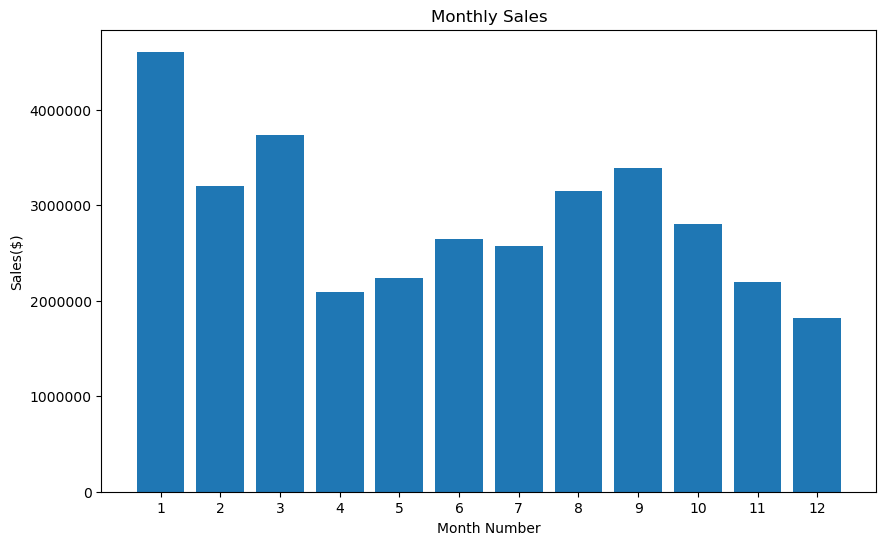

In [39]:
months = range(1,13)

plt.figure(figsize = (10,6))
plt.bar(months, monthly_sales['sales'])
plt.xticks(months)
plt.ylabel('Sales($)')
plt.xlabel('Month Number')
plt.title('Monthly Sales')

#changing the y axis to full number

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


#2. What city had the highest number of sales?

In [41]:
df2

,order_id,product,quantity_ordered,price_each,purchase_address,month,hour,sales
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,8,23.90
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,22,99.99
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,9,11.99
...,...,...,...,...,...,...,...,...
185658,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,20,8.97
185659,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,16,700.00
185660,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,7,700.00
185661,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,17,379.99


In [42]:
df2['purchase_address']


0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
185658     840 Highland St, Los Angeles, CA 90001
185659    216 Dogwood St, San Francisco, CA 94016
185660       220 12th St, San Francisco, CA 94016
185661     511 Forest St, San Francisco, CA 94016
185662     250 Meadow St, San Francisco, CA 94016
Name: purchase_address, Length: 185663, dtype: object

In [43]:
df2['city'] = df2['purchase_address'].str.split(',').str.get(1)
df2['city']

0                 Dallas
1                 Boston
2            Los Angeles
3            Los Angeles
4            Los Angeles
               ...      
185658       Los Angeles
185659     San Francisco
185660     San Francisco
185661     San Francisco
185662     San Francisco
Name: city, Length: 185663, dtype: object

In [44]:
df2.head(11)

,order_id,product,quantity_ordered,price_each,purchase_address,month,hour,sales,city
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles
5,176562,USB-C Charging Cable,1,11.95,"381 Wilson St, San Francisco, CA 94016",4,13,11.95,San Francisco
6,176563,Bose SoundSport Headphones,1,99.99,"668 Center St, Seattle, WA 98101",4,7,99.99,Seattle
7,176564,USB-C Charging Cable,1,11.95,"790 Ridge St, Atlanta, GA 30301",4,10,11.95,Atlanta
8,176565,Macbook Pro Laptop,1,1700.00,"915 Willow St, San Francisco, CA 94016",4,10,1700.00,San Francisco
9,176566,Wired Headphones,1,11.99,"83 7th St, Boston, MA 02215",4,14,11.99,Boston


In [45]:
city_sales = df2.groupby('city')['sales'].sum().reset_index()
city_sales

,city,sales
0,Atlanta,2794180.28
1,Austin,1817981.58
2,Boston,3658605.02
3,Dallas,2765262.45
4,Los Angeles,5447752.34
5,New York City,4661267.14
6,Portland,2319316.99
7,San Francisco,8252562.83
8,Seattle,2744746.02


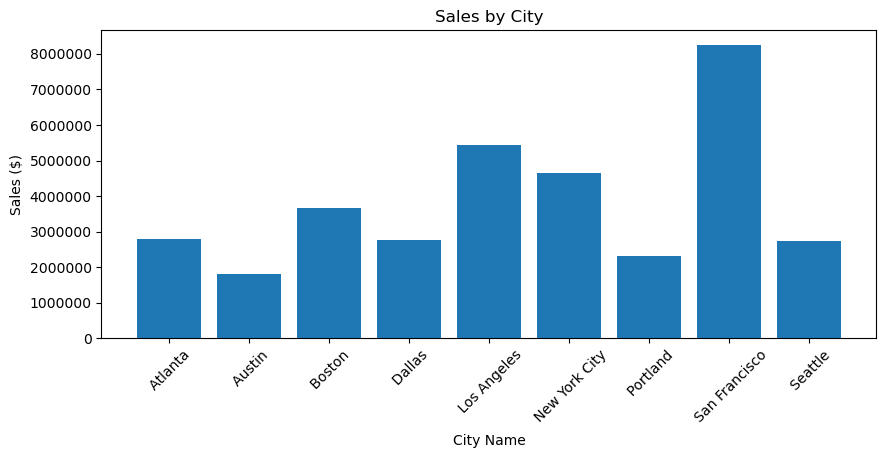

In [46]:
cities = city_sales['city']

# Plotting with matplotlib
plt.figure(figsize=(10, 4))
plt.bar(cities, city_sales['sales'])
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.ylabel('Sales ($)')
plt.xlabel('City Name')
plt.title('Sales by City')


# format full from exponential

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

#3. What time should we display advertisements to maximize likelihod of customer's buying product?


In [47]:
df.head(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99


In [48]:
df2.head(5)

,order_id,product,quantity_ordered,price_each,purchase_address,month,hour,sales,city
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles


In [49]:
#df['time_order'] = df['time_order'].apply(lambda x: x.strftime('%I:%M %p'))

In [50]:
#df['time_order']

In [51]:
# change am/pm to 24 format
#df['time_24hr'] = pd.to_datetime(df['time_order'], format='%I:%M %p').dt.strftime('%H:%M')
#df['hour'] = df['time_24hr'].str.split(':').str.get(0)
#df['hour'].unique()

In [52]:
df2['hour'].astype(int)

0          8
1         22
2         14
3         14
4          9
          ..
185658    20
185659    16
185660     7
185661    17
185662     0
Name: hour, Length: 185663, dtype: int32

In [53]:
#using define function to categorize time session

# Define function to categorize time into sessions
def time_categories(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the hour column
df2['session'] = df2['hour'].apply(time_categories)

In [54]:
df2.head()

,order_id,product,quantity_ordered,price_each,purchase_address,month,hour,sales,city,session
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas,Morning
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston,Evening
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles,Afternoon
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles,Afternoon
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles,Morning


In [55]:
best_session = df2.groupby('session')['quantity_ordered'].sum().reset_index()

In [56]:
best_session_result = best_session[['quantity_ordered','session']]
best_session_result

,quantity_ordered,session
0,77191,Afternoon
1,83365,Evening
2,36443,Morning
3,11786,Night


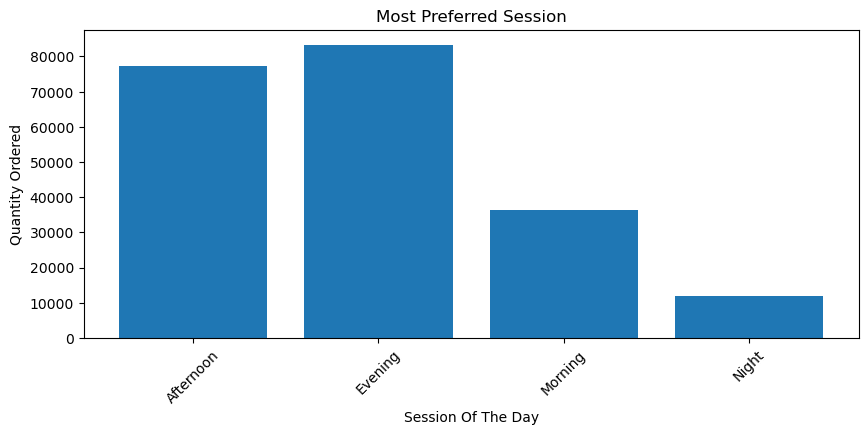

In [57]:
time_session = best_session_result['session']
quantity = best_session_result['quantity_ordered']

plt.figure(figsize = (10,4))
plt.bar(time_session, quantity)
plt.xticks(rotation = 45)
plt.ylabel('Quantity Ordered')
plt.xlabel('Session Of The Day')
plt.title('Most Preferred Session')
plt.show()

In [58]:
#2nd option: plotting based on 1 hour timeframe for the day

df2.head()

,order_id,product,quantity_ordered,price_each,purchase_address,month,hour,sales,city,session
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas,Morning
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston,Evening
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles,Afternoon
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles,Afternoon
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles,Morning


In [73]:
hourly_sales = df2.groupby('hour')['quantity_ordered'].sum().reset_index()
hourly_sales

,hour,quantity_ordered
0,0,4420
1,1,2615
2,2,1397
3,3,927
4,4,935
5,5,1492
6,6,2809
7,7,4545
8,8,6997
9,9,9806


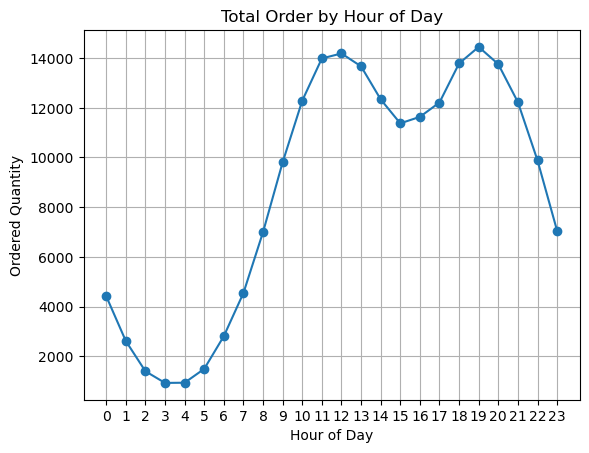

In [74]:

hours = hourly_sales['hour']
sales = hourly_sales['quantity_ordered']

# Plot the data
plt.plot(hours, sales, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Ordered Quantity')
plt.title('Total Order by Hour of Day')
plt.xticks(hours)  # Set x-ticks to be each hour
plt.grid(True)
plt.show()

# Q1,Q2 & Q3 have to transfer to new data frame (df2) -- argument, cant use date time to run calculation

#4. What products are most often sold together?

In [75]:
df['product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [76]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99


In [104]:
# Finding only the duplicated order id
df3 = df[df['order_id'].duplicated(keep = False)]
df3

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",19,4,600.00
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",19,4,11.95
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",17,4,5.98
...,...,...,...,...,...,...,...,...,...
185606,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",20,9,3.84
185617,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",0,9,11.99
185618,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",0,9,5.98
185654,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",13,9,600.00


In [105]:
df3['grouped'] = df3.groupby('order_id')['product'].transform(lambda x: ', '.join(x))

C:\Users\User\AppData\Local\Temp\ipykernel_4444\4118234972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['grouped'] = df3.groupby('order_id')['product'].transform(lambda x: ', '.join(x))


In [106]:
df3.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales,grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99,"Google Phone, Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",19,4,600.00,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",19,4,11.95,"Google Phone, USB-C Charging Cable"
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",17,4,5.98,"AAA Batteries (4-pack), Google Phone"


In [107]:
df3 = df3[['order_id','grouped']].drop_duplicates()
df3.head()
#pd.set_option('display.max_rows',100)

,order_id,grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack), Google Phone"
117,176672,"Lightning Charging Cable, USB-C Charging Cable"
127,176681,"Apple Airpods Headphones, ThinkPad Laptop"


In [109]:
df3['grouped'].duplicated().sum()

6528

In [120]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 5)))

for key, value in count.most_common(10):
    print(key,value)



('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones', ' Wired Headphones', ' Google Phone') 1


In [96]:
df3

,order_id,grouped_id
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack), Google Phone"
117,176672,"Lightning Charging Cable, USB-C Charging Cable"
127,176681,"Apple Airpods Headphones, ThinkPad Laptop"
...,...,...
185577,259277,"iPhone, Wired Headphones"
185598,259297,"iPhone, Lightning Charging Cable"
185605,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
185617,259314,"Wired Headphones, AAA Batteries (4-pack)"


#5. What Products sold the most? Why do you think so?


In [123]:
df['product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [144]:
product_group = df.groupby('product')['quantity_ordered'].sum().reset_index()
product_group

,product,quantity_ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6238
2,27in FHD Monitor,7540
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27608
5,AAA Batteries (4-pack),30985
6,Apple Airpods Headphones,15636
7,Bose SoundSport Headphones,13429
8,Flatscreen TV,4811
9,Google Phone,5529


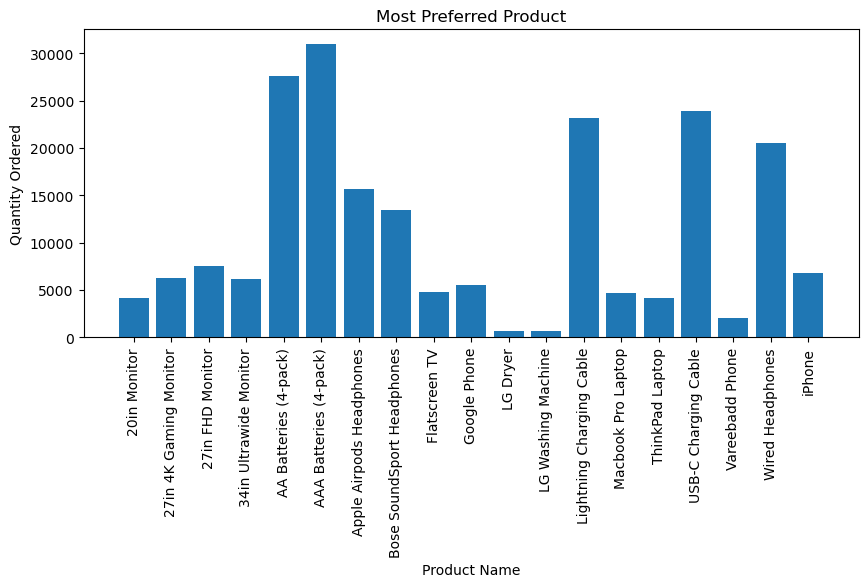

In [152]:
product_name = product_group['product']
product_name
quantity = product_group['quantity_ordered']
quantity

plt.figure(figsize = (10,4))
plt.bar(product_name, quantity)
plt.xticks(rotation = 90)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')
plt.title('Most Preferred Product')
plt.show()

In [153]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,hour,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99


In [158]:
prices = df.groupby('product')['price_each'].mean()
prices

product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: price_each, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_4444\3640938478.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_name, rotation = 90, size = 8)


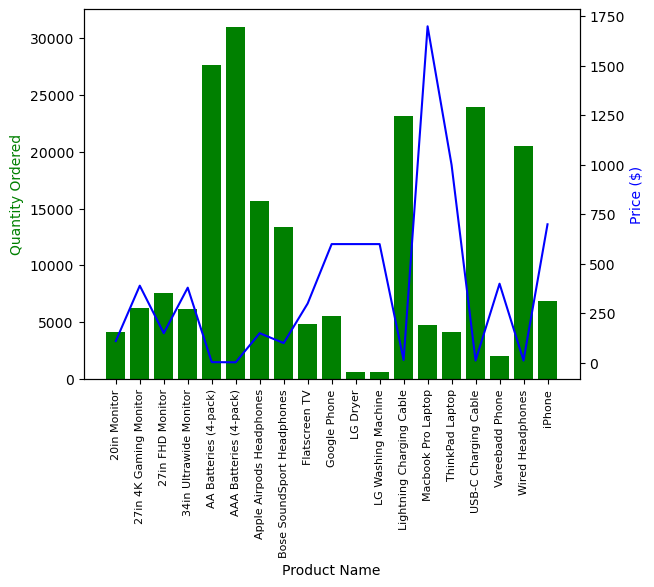

In [161]:
# adding y-axis to existing y-axis

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_name, quantity, color = 'g')
ax2.plot(product_name, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(product_name, rotation = 90, size = 8)

plt.show()


In [151]:
# saving the 12 months file
df.to_csv("all_data.csv", index = False)